In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from feature_engine.creation import CyclicalFeatures
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

plant_flows = pd.read_csv("plant flows 2014-2021 summary.csv")

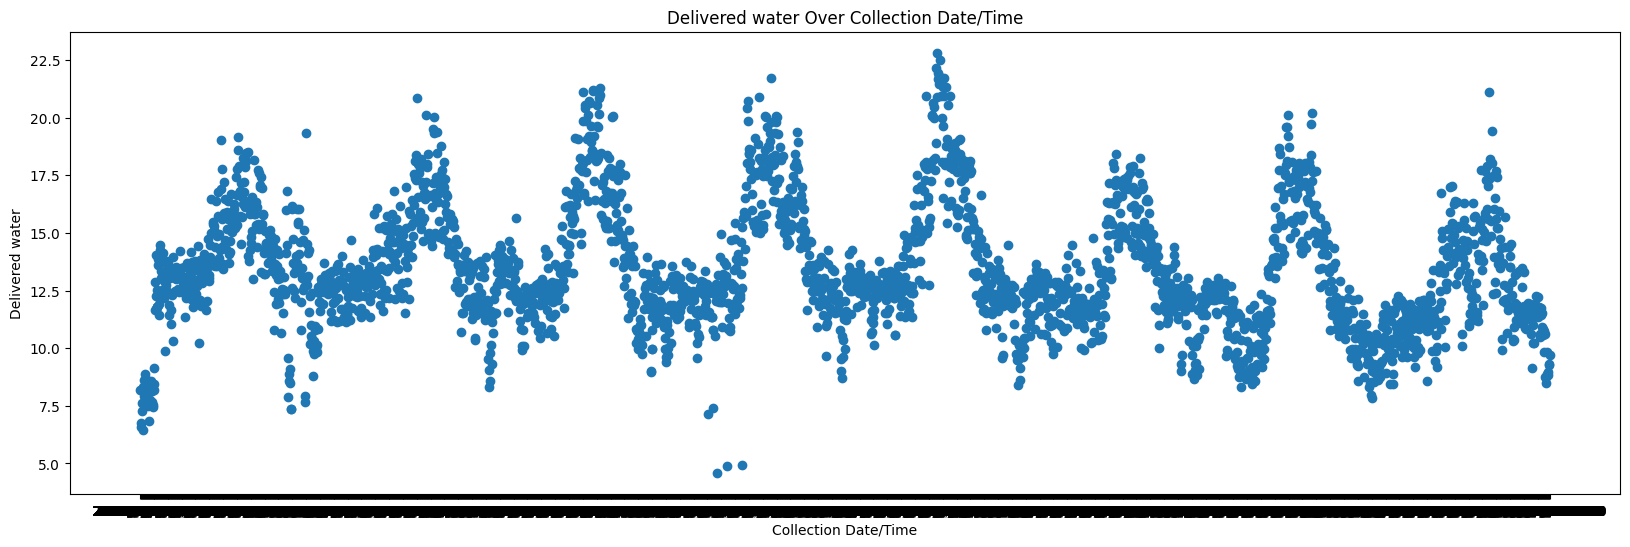

In [2]:
plt.figure(figsize=(20, 6))
plt.scatter(plant_flows['Collection Date/Time'], plant_flows["Delivered water"]) 
plt.xlabel('Collection Date/Time')
plt.ylabel('Delivered water')
plt.title('Delivered water Over Collection Date/Time')
plt.show()

In [3]:
noaa = pd.read_csv("NOAA Data 2014-2023.csv")
aa_rain = pd.read_csv("AA Raining 2014-2023.csv")

In [4]:
plant_flows.head(5)

Collection Date/Time  Delivered water
0        2014/1/1 0:00         8.172253
1        2014/1/2 0:00         6.600033
2        2014/1/3 0:00         6.768595
3        2014/1/4 0:00         7.283260
4        2014/1/5 0:00         7.635458

In [5]:
len(plant_flows)

2938

In [6]:
nan_values = plant_flows.isna().sum()
nan_values

Collection Date/Time    0
Delivered water         0
dtype: int64

In [7]:
aa_rain.head(5)

period  Barton Pond  CityHall  Jackson  N Campus Pump Station  \
0  2014/1/1          NaN      0.03     0.14                   0.02   
1  2014/1/2          NaN      0.02     0.06                   0.00   
2  2014/1/3          NaN      0.00     0.00                   0.00   
3  2014/1/4          NaN      0.00     0.00                   0.00   
4  2014/1/5          NaN      0.35     0.68                   0.17   

   S Industrial  
0          0.03  
1          0.00  
2          0.00  
3          0.00  
4          0.64

In [8]:
len(aa_rain)

3578

In [9]:
nan_values = aa_rain.isna().sum()
nan_values

period                      0
Barton Pond              2996
CityHall                   98
Jackson                   195
N Campus Pump Station     367
S Industrial              400
dtype: int64

In [10]:
noaa.tail(5)

STATION                        NAME  LATITUDE  LONGITUDE  ELEVATION  \
3570  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388      247.8   
3571  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388      247.8   
3572  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388      247.8   
3573  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388      247.8   
3574  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388      247.8   

            DATE  PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  WESD  
3570  2023-10-11  0.02   NaN   0.0   0.0   NaN    62  45.0    59   NaN  
3571  2023-10-12  0.00   NaN   0.0   0.0   NaN    61  39.0    58   NaN  
3572  2023-10-13  0.01   NaN   0.0   0.0   NaN    58  46.0    53   NaN  
3573  2023-10-14  0.45   NaN   0.0   0.0   NaN    53  46.0    50   NaN  
3574  2023-10-15  0.00   NaN   0.0   0.0   NaN    53  40.0    51   NaN

In [11]:
len(noaa)

3575

In [12]:
nan_values = noaa.isna().sum()
nan_values

STATION         0
NAME            0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
DATE            0
PRCP            1
SN52           45
SNOW          245
SNWD          246
SX52           45
TMAX            0
TMIN            1
TOBS            0
WESD         3467
dtype: int64

In [13]:
aa_rain['period'] = pd.to_datetime(aa_rain['period'])
noaa['DATE'] = pd.to_datetime(noaa['DATE'])


In [14]:
new = pd.merge(noaa, aa_rain, left_on=noaa['DATE'], right_on=aa_rain['period'], how='inner')
new = new.drop(columns=['DATE','period'])
new = new.rename(columns={'key_0': 'dt'})
new.head(5)

dt      STATION                        NAME  LATITUDE  LONGITUDE  \
0 2014-01-01  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388   
1 2014-01-02  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388   
2 2014-01-03  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388   
3 2014-01-04  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388   
4 2014-01-05  USC00200230  ANN ARBOR U OF MICH, MI US  42.29806  -83.66388   

   ELEVATION  PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  WESD  \
0      247.8  0.33  30.0   4.7   6.0  31.0    16  12.0    12   NaN   
1      247.8  0.41  30.0   4.3   8.0  30.0    15  10.0    10   NaN   
2      247.8  0.01  30.0   0.2   7.0  30.0    16  -6.0     7   NaN   
3      247.8  0.00  30.0   0.0   6.0  30.0    30   7.0    27   NaN   
4      247.8  0.56  30.0   5.6  12.0  30.0    31  25.0    25   NaN   

   Barton Pond  CityHall  Jackson  N Campus Pump Station  S Industrial  
0          NaN      0.03     0.14                   0.02          0.03  
1          NaN      0.02     0.06                   0.00          0.00  
2          NaN      0.00     0.00                   0.00          0.00  
3          NaN      0.00     0.00                   0.00          0.00  
4          NaN      0.35     0.68                   0.17          0.64

In [15]:
plant_flows['Collection Date/Time'] = pd.to_datetime(plant_flows['Collection Date/Time'])

In [16]:
all_data = pd.merge(plant_flows, new, left_on=plant_flows['Collection Date/Time'], right_on=new['dt'], how='inner')
all_data = all_data.drop(columns=['key_0','dt','WESD','Barton Pond','STATION','NAME','LATITUDE','LONGITUDE','ELEVATION'])
all_data.head(5)

Collection Date/Time  Delivered water  PRCP  SN52  SNOW  SNWD  SX52  TMAX  \
0           2014-01-01         8.172253  0.33  30.0   4.7   6.0  31.0    16   
1           2014-01-02         6.600033  0.41  30.0   4.3   8.0  30.0    15   
2           2014-01-03         6.768595  0.01  30.0   0.2   7.0  30.0    16   
3           2014-01-04         7.283260  0.00  30.0   0.0   6.0  30.0    30   
4           2014-01-05         7.635458  0.56  30.0   5.6  12.0  30.0    31   

   TMIN  TOBS  CityHall  Jackson  N Campus Pump Station  S Industrial  
0  12.0    12      0.03     0.14                   0.02          0.03  
1  10.0    10      0.02     0.06                   0.00          0.00  
2  -6.0     7      0.00     0.00                   0.00          0.00  
3   7.0    27      0.00     0.00                   0.00          0.00  
4  25.0    25      0.35     0.68                   0.17          0.64

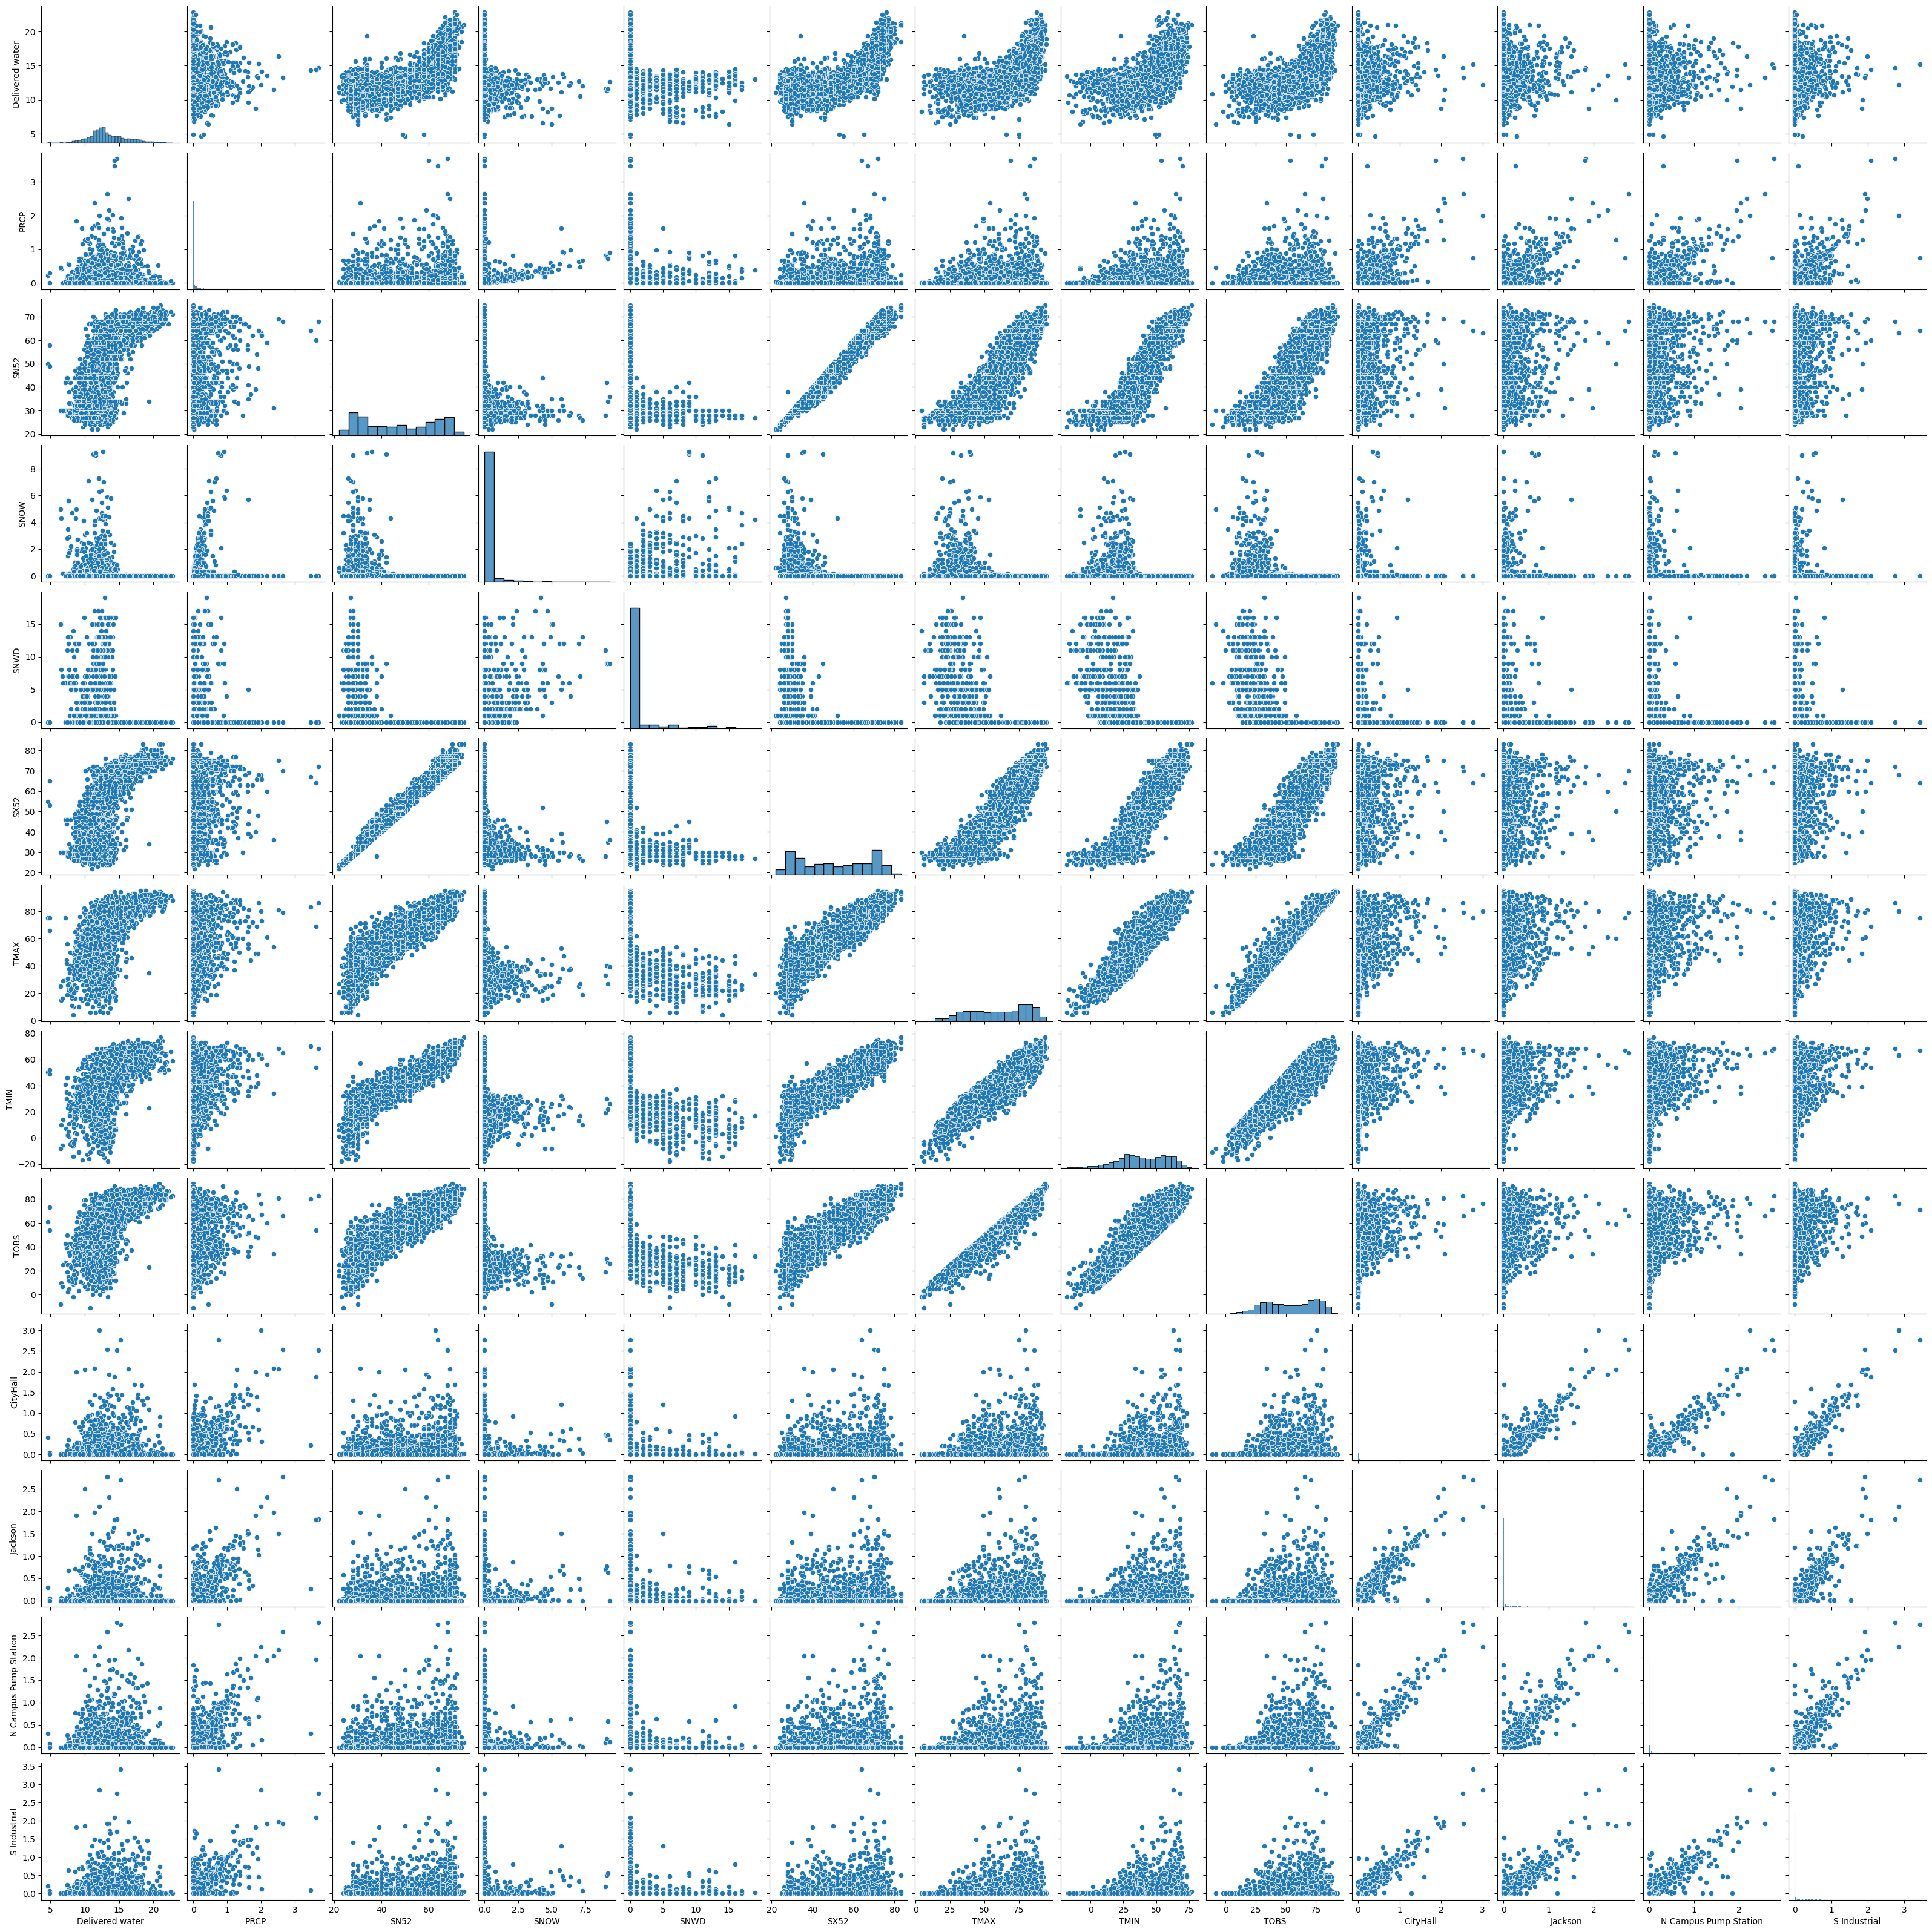

In [17]:
import seaborn as sns

sns.pairplot(all_data)

In [18]:
all_data.corr()

C:\Users\thhelen\AppData\Local\Temp\ipykernel_21944\2125457306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data.corr()


Delivered water      PRCP      SN52      SNOW  \
Delivered water               1.000000 -0.025262  0.713360 -0.161745   
PRCP                         -0.025262  1.000000  0.078077  0.190850   
SN52                          0.713360  0.078077  1.000000 -0.256648   
SNOW                         -0.161745  0.190850 -0.256648  1.000000   
SNWD                         -0.186317  0.000799 -0.408729  0.425452   
SX52                          0.717577  0.058424  0.990363 -0.268024   
TMAX                          0.649421  0.053350  0.912400 -0.320829   
TMIN                          0.632660  0.149851  0.916574 -0.269665   
TOBS                          0.652389  0.013113  0.903319 -0.332831   
CityHall                      0.023360  0.731990  0.125993  0.044918   
Jackson                       0.019158  0.738969  0.111384  0.084716   
N Campus Pump Station         0.031160  0.717742  0.132551 -0.000412   
S Industrial                  0.030353  0.705119  0.132454  0.056437   

                           SNWD      SX52      TMAX      TMIN      TOBS  \
Delivered water       -0.186317  0.717577  0.649421  0.632660  0.652389   
PRCP                   0.000799  0.058424  0.053350  0.149851  0.013113   
SN52                  -0.408729  0.990363  0.912400  0.916574  0.903319   
SNOW                   0.425452 -0.268024 -0.320829 -0.269665 -0.332831   
SNWD                   1.000000 -0.429116 -0.497272 -0.512294 -0.491446   
SX52                  -0.429116  1.000000  0.925686  0.905430  0.918035   
TMAX                  -0.497272  0.925686  1.000000  0.923110  0.974202   
TMIN                  -0.512294  0.905430  0.923110  1.000000  0.906754   
TOBS                  -0.491446  0.918035  0.974202  0.906754  1.000000   
CityHall              -0.060854  0.111126  0.118002  0.189905  0.083603   
Jackson               -0.040966  0.096852  0.099428  0.180795  0.064960   
N Campus Pump Station -0.075440  0.116703  0.123999  0.195290  0.092210   
S Industrial          -0.058044  0.115229  0.120388  0.196220  0.084533   

                       CityHall   Jackson  N Campus Pump Station  S Industrial  
Delivered water        0.023360  0.019158               0.031160      0.030353  
PRCP                   0.731990  0.738969               0.717742      0.705119  
SN52                   0.125993  0.111384               0.132551      0.132454  
SNOW                   0.044918  0.084716              -0.000412      0.056437  
SNWD                  -0.060854 -0.040966              -0.075440     -0.058044  
SX52                   0.111126  0.096852               0.116703      0.115229  
TMAX                   0.118002  0.099428               0.123999      0.120388  
TMIN                   0.189905  0.180795               0.195290      0.196220  
TOBS                   0.083603  0.064960               0.092210      0.084533  
CityHall               1.000000  0.939848               0.951845      0.953600  
Jackson                0.939848  1.000000               0.909398      0.907061  
N Campus Pump Station  0.951845  0.909398               1.000000      0.908360  
S Industrial           0.953600  0.907061               0.908360      1.000000

In [19]:
all_data.isna().sum()

Collection Date/Time       0
Delivered water            0
PRCP                       0
SN52                       0
SNOW                     245
SNWD                     245
SX52                       0
TMAX                       0
TMIN                       0
TOBS                       0
CityHall                  16
Jackson                  195
N Campus Pump Station     40
S Industrial             366
dtype: int64

In [20]:
all_data['Month'] = all_data['Collection Date/Time'].dt.month
monthly_means = all_data.groupby('Month').mean()

columns_to_impute = ['CityHall', 'Jackson', 'N Campus Pump Station', 'S Industrial','SNOW','SNWD']

# Impute missing values only in the specified columns using the mean of each month
for column in columns_to_impute:
    all_data[column] = all_data[column].fillna(all_data['Month'].map(monthly_means[column]))

# Drop the 'Month' column as it was temporarily added for grouping
all_data = all_data.drop(columns=['Month'])


C:\Users\thhelen\AppData\Local\Temp\ipykernel_21944\1461907460.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = all_data.groupby('Month').mean()


In [21]:
all_data.isna().sum()

Collection Date/Time     0
Delivered water          0
PRCP                     0
SN52                     0
SNOW                     0
SNWD                     0
SX52                     0
TMAX                     0
TMIN                     0
TOBS                     0
CityHall                 0
Jackson                  0
N Campus Pump Station    0
S Industrial             0
dtype: int64

In [22]:
train_data = all_data

In [23]:
train_data['Collection_Date_Time'] = train_data['Collection Date/Time']
train_data['Delivered_water'] = train_data['Delivered water']
train_data = train_data.drop(columns=['Collection Date/Time','Delivered water'])
train_data

PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  CityHall  Jackson  \
0     0.33  30.0   4.7   6.0  31.0    16  12.0    12      0.03     0.14   
1     0.41  30.0   4.3   8.0  30.0    15  10.0    10      0.02     0.06   
2     0.01  30.0   0.2   7.0  30.0    16  -6.0     7      0.00     0.00   
3     0.00  30.0   0.0   6.0  30.0    30   7.0    27      0.00     0.00   
4     0.56  30.0   5.6  12.0  30.0    31  25.0    25      0.35     0.68   
...    ...   ...   ...   ...   ...   ...   ...   ...       ...      ...   
2933  0.30  33.0   1.0   0.0  33.0    36  27.0    35      0.16     0.24   
2934  0.18  32.0   1.9   2.0  33.0    40  31.0    31      0.15     0.00   
2935  0.11  32.0   0.3   1.0  32.0    37  31.0    33      0.00     0.24   
2936  0.00  32.0   0.0   0.0  32.0    33  29.0    32      0.00     0.00   
2937  0.03  32.0   0.0   0.0  33.0    43  32.0    41      0.00     0.03   

      N Campus Pump Station  S Industrial Collection_Date_Time  \
0                      0.02          0.03           2014-01-01   
1                      0.00          0.00           2014-01-02   
2                      0.00          0.00           2014-01-03   
3                      0.00          0.00           2014-01-04   
4                      0.17          0.64           2014-01-05   
...                     ...           ...                  ...   
2933                   0.18          0.17           2021-12-27   
2934                   0.15          0.15           2021-12-28   
2935                   0.00          0.00           2021-12-29   
2936                   0.00          0.00           2021-12-30   
2937                   0.00          0.00           2021-12-31   

      Delivered_water  
0            8.172253  
1            6.600033  
2            6.768595  
3            7.283260  
4            7.635458  
...               ...  
2933         8.947762  
2934         8.817008  
2935         9.290177  
2936         9.330486  
2937         9.699518  

[2938 rows x 14 columns]

In [24]:
dict1 = {'Year':train_data['Collection_Date_Time'].dt.year, 'Month':train_data['Collection_Date_Time'].dt.month, 'Day':train_data['Collection_Date_Time'].dt.day}
date_and_time = pd.DataFrame(data=dict1)
train_data = pd.concat([train_data, date_and_time], axis=1)
train_data

PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  CityHall  Jackson  \
0     0.33  30.0   4.7   6.0  31.0    16  12.0    12      0.03     0.14   
1     0.41  30.0   4.3   8.0  30.0    15  10.0    10      0.02     0.06   
2     0.01  30.0   0.2   7.0  30.0    16  -6.0     7      0.00     0.00   
3     0.00  30.0   0.0   6.0  30.0    30   7.0    27      0.00     0.00   
4     0.56  30.0   5.6  12.0  30.0    31  25.0    25      0.35     0.68   
...    ...   ...   ...   ...   ...   ...   ...   ...       ...      ...   
2933  0.30  33.0   1.0   0.0  33.0    36  27.0    35      0.16     0.24   
2934  0.18  32.0   1.9   2.0  33.0    40  31.0    31      0.15     0.00   
2935  0.11  32.0   0.3   1.0  32.0    37  31.0    33      0.00     0.24   
2936  0.00  32.0   0.0   0.0  32.0    33  29.0    32      0.00     0.00   
2937  0.03  32.0   0.0   0.0  33.0    43  32.0    41      0.00     0.03   

      N Campus Pump Station  S Industrial Collection_Date_Time  \
0                      0.02          0.03           2014-01-01   
1                      0.00          0.00           2014-01-02   
2                      0.00          0.00           2014-01-03   
3                      0.00          0.00           2014-01-04   
4                      0.17          0.64           2014-01-05   
...                     ...           ...                  ...   
2933                   0.18          0.17           2021-12-27   
2934                   0.15          0.15           2021-12-28   
2935                   0.00          0.00           2021-12-29   
2936                   0.00          0.00           2021-12-30   
2937                   0.00          0.00           2021-12-31   

      Delivered_water  Year  Month  Day  
0            8.172253  2014      1    1  
1            6.600033  2014      1    2  
2            6.768595  2014      1    3  
3            7.283260  2014      1    4  
4            7.635458  2014      1    5  
...               ...   ...    ...  ...  
2933         8.947762  2021     12   27  
2934         8.817008  2021     12   28  
2935         9.290177  2021     12   29  
2936         9.330486  2021     12   30  
2937         9.699518  2021     12   31  

[2938 rows x 17 columns]

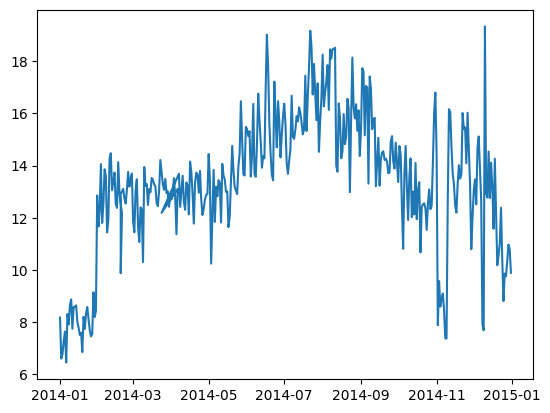

<Figure size 2000x1000 with 0 Axes>

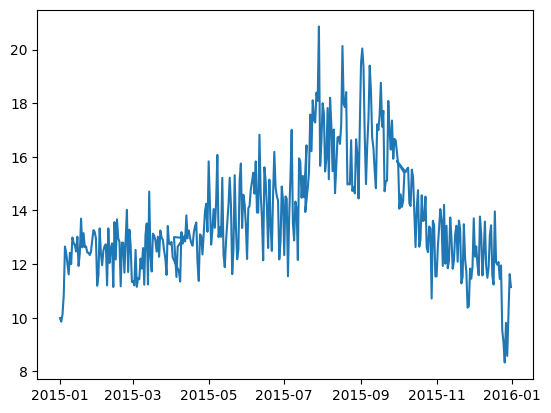

<Figure size 2000x1000 with 0 Axes>

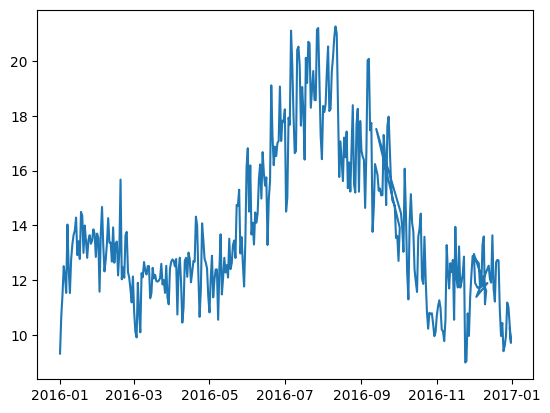

<Figure size 2000x1000 with 0 Axes>

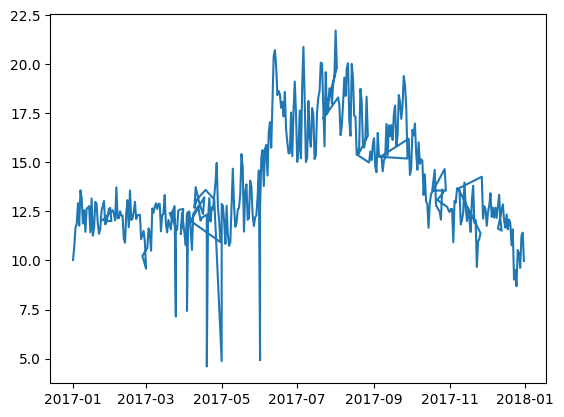

<Figure size 2000x1000 with 0 Axes>

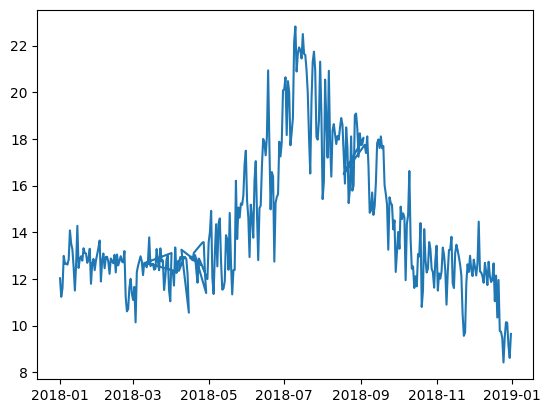

<Figure size 2000x1000 with 0 Axes>

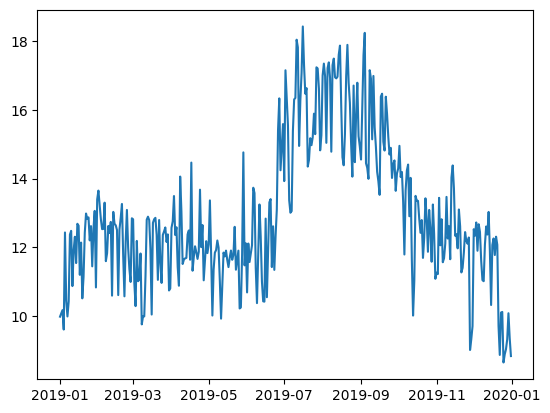

<Figure size 2000x1000 with 0 Axes>

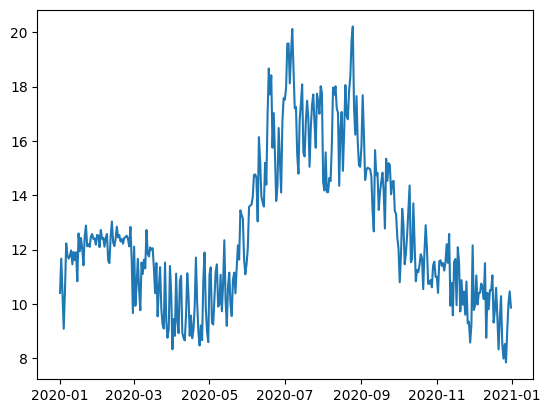

<Figure size 2000x1000 with 0 Axes>

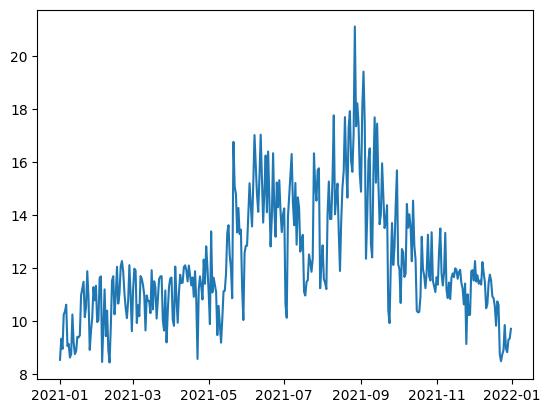

<Figure size 2000x1000 with 0 Axes>

In [25]:
unique_years = train_data['Year'].unique()
for i, year in enumerate(unique_years):
    data_for_year = train_data[train_data['Year'] == year]
    plt.plot(data_for_year['Collection_Date_Time'], data_for_year['Delivered_water'])
    plt.figure(figsize=(20, 10))
    plt.show()

In [26]:
seasons = {
    1: 'Other',
    2: 'Other',
    3: 'Other',
    4: 'Other',
    5: 'Other',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Other',
    10: 'Other',
    11: 'Other',
    12: 'Other',
}

train_data['Season'] = train_data['Month'].apply(lambda x: seasons.get(x), 'Unknown')

seasons_encoded = pd.get_dummies(train_data['Season'], prefix='Season')
train_data = pd.concat([train_data, seasons_encoded], axis=1)
train_data = train_data.drop(['Season'], axis=1)
train_data.head(5)

PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  CityHall  Jackson  \
0  0.33  30.0   4.7   6.0  31.0    16  12.0    12      0.03     0.14   
1  0.41  30.0   4.3   8.0  30.0    15  10.0    10      0.02     0.06   
2  0.01  30.0   0.2   7.0  30.0    16  -6.0     7      0.00     0.00   
3  0.00  30.0   0.0   6.0  30.0    30   7.0    27      0.00     0.00   
4  0.56  30.0   5.6  12.0  30.0    31  25.0    25      0.35     0.68   

   N Campus Pump Station  S Industrial Collection_Date_Time  Delivered_water  \
0                   0.02          0.03           2014-01-01         8.172253   
1                   0.00          0.00           2014-01-02         6.600033   
2                   0.00          0.00           2014-01-03         6.768595   
3                   0.00          0.00           2014-01-04         7.283260   
4                   0.17          0.64           2014-01-05         7.635458   

   Year  Month  Day  Season_Other  Season_Summer  
0  2014      1    1             1              0  
1  2014      1    2             1              0  
2  2014      1    3             1              0  
3  2014      1    4             1              0  
4  2014      1    5             1              0

In [27]:
cyclical = CyclicalFeatures(variables=None, drop_original=True)
cy = cyclical.fit_transform(train_data[['Month']])
train_data = pd.concat([train_data, cy],axis=1)
train_data = train_data.drop(columns=['Month'])
train_data

PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  CityHall  Jackson  \
0     0.33  30.0   4.7   6.0  31.0    16  12.0    12      0.03     0.14   
1     0.41  30.0   4.3   8.0  30.0    15  10.0    10      0.02     0.06   
2     0.01  30.0   0.2   7.0  30.0    16  -6.0     7      0.00     0.00   
3     0.00  30.0   0.0   6.0  30.0    30   7.0    27      0.00     0.00   
4     0.56  30.0   5.6  12.0  30.0    31  25.0    25      0.35     0.68   
...    ...   ...   ...   ...   ...   ...   ...   ...       ...      ...   
2933  0.30  33.0   1.0   0.0  33.0    36  27.0    35      0.16     0.24   
2934  0.18  32.0   1.9   2.0  33.0    40  31.0    31      0.15     0.00   
2935  0.11  32.0   0.3   1.0  32.0    37  31.0    33      0.00     0.24   
2936  0.00  32.0   0.0   0.0  32.0    33  29.0    32      0.00     0.00   
2937  0.03  32.0   0.0   0.0  33.0    43  32.0    41      0.00     0.03   

      N Campus Pump Station  S Industrial Collection_Date_Time  \
0                      0.02          0.03           2014-01-01   
1                      0.00          0.00           2014-01-02   
2                      0.00          0.00           2014-01-03   
3                      0.00          0.00           2014-01-04   
4                      0.17          0.64           2014-01-05   
...                     ...           ...                  ...   
2933                   0.18          0.17           2021-12-27   
2934                   0.15          0.15           2021-12-28   
2935                   0.00          0.00           2021-12-29   
2936                   0.00          0.00           2021-12-30   
2937                   0.00          0.00           2021-12-31   

      Delivered_water  Year  Day  Season_Other  Season_Summer     Month_sin  \
0            8.172253  2014    1             1              0  5.000000e-01   
1            6.600033  2014    2             1              0  5.000000e-01   
2            6.768595  2014    3             1              0  5.000000e-01   
3            7.283260  2014    4             1              0  5.000000e-01   
4            7.635458  2014    5             1              0  5.000000e-01   
...               ...   ...  ...           ...            ...           ...   
2933         8.947762  2021   27             1              0 -2.449294e-16   
2934         8.817008  2021   28             1              0 -2.449294e-16   
2935         9.290177  2021   29             1              0 -2.449294e-16   
2936         9.330486  2021   30             1              0 -2.449294e-16   
2937         9.699518  2021   31             1              0 -2.449294e-16   

      Month_cos  
0      0.866025  
1      0.866025  
2      0.866025  
3      0.866025  
4      0.866025  
...         ...  
2933   1.000000  
2934   1.000000  
2935   1.000000  
2936   1.000000  
2937   1.000000  

[2938 rows x 20 columns]

In [28]:
train_data1 = train_data[(train_data['Year'] <2020)]
test_data = train_data[(train_data['Year'] >= 2020)]

In [29]:
train_data1 = train_data1.drop(columns=['Collection_Date_Time','Day'])
test_data = test_data.drop(columns=['Collection_Date_Time','Day'])

In [30]:
X_train=train_data1.drop(columns=['Delivered_water'])
y_train=train_data1['Delivered_water']
X_test=test_data.drop(columns=['Delivered_water'])
y_test=test_data['Delivered_water']

In [31]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [32]:
pred = model.predict(X_test)

rmse = mean_squared_error(y_test, pred)
print(f'Mean Square Error: {rmse}')

Mean Square Error: 2.835437179829235


In [33]:
from datetime import datetime, timedelta
data = []
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 12, 31)
step = timedelta(days=1)
current_date = start_date
while current_date <= end_date:
    formatted_date = current_date.strftime('%#Y/%#m/%#d %#H:%M')
    data.append([formatted_date, 0])
    current_date += step
df = pd.DataFrame(data, columns=['Collection Date/Time', 'Delivered water'])
print(df)

    Collection Date/Time  Delivered water
0          2020/1/1 0:00                0
1          2020/1/2 0:00                0
2          2020/1/3 0:00                0
3          2020/1/4 0:00                0
4          2020/1/5 0:00                0
..                   ...              ...
726      2021/12/27 0:00                0
727      2021/12/28 0:00                0
728      2021/12/29 0:00                0
729      2021/12/30 0:00                0
730      2021/12/31 0:00                0

[731 rows x 2 columns]


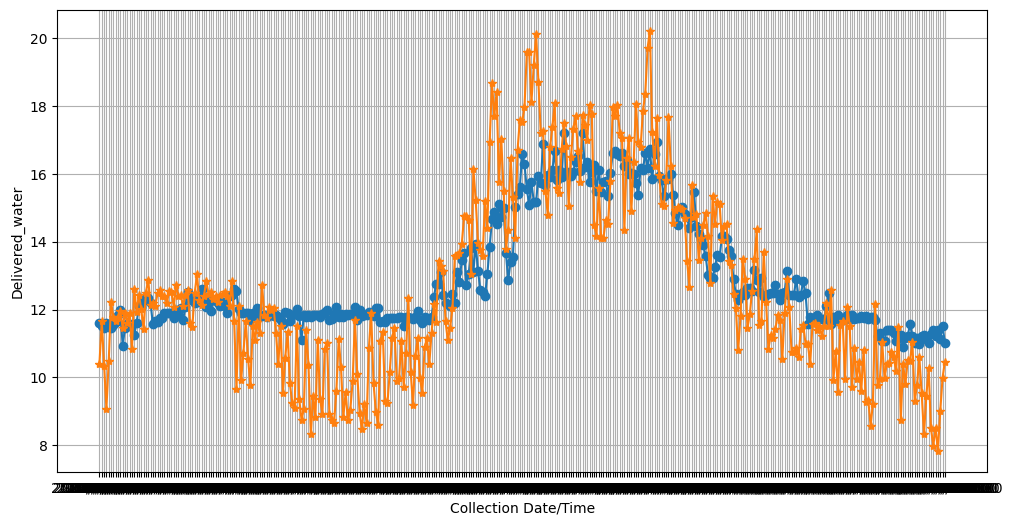

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['Collection Date/Time'][:365], pred[:365], marker='o')
plt.plot(df['Collection Date/Time'][:365], y_test[:365],marker="*")
plt.xlabel('Collection Date/Time')
plt.ylabel('Delivered_water')
plt.grid()
plt.show()

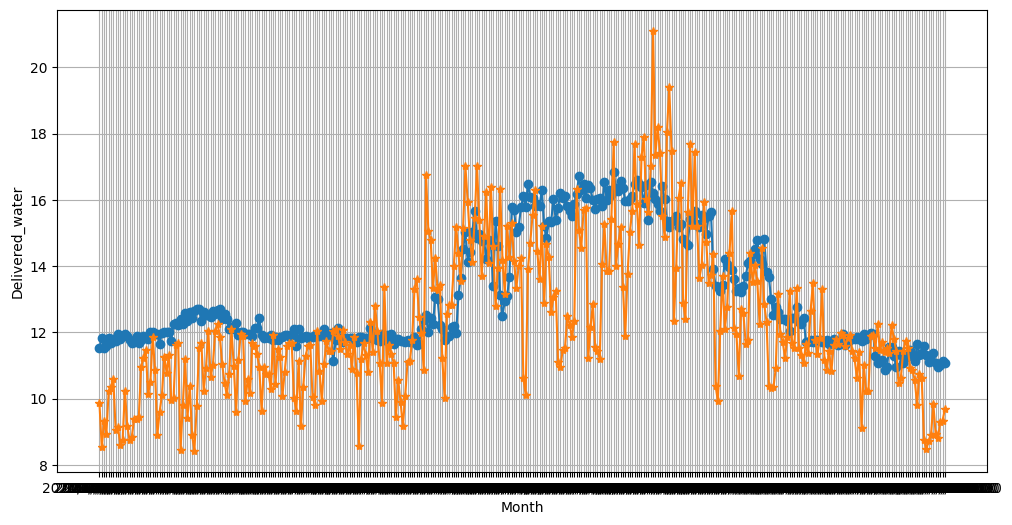

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df['Collection Date/Time'][365:], pred[365:], marker='o')
plt.plot(df['Collection Date/Time'][365:], y_test[365:],marker="*")
plt.xlabel('Month')
plt.ylabel('Delivered_water')
plt.grid()
plt.show()

TESTING


In [36]:
new1 = pd.merge(noaa, aa_rain, left_on=noaa['DATE'], right_on=aa_rain['period'], how='inner')
new1= new1.drop(columns=['DATE','period','WESD','Barton Pond','STATION','NAME','LATITUDE','LONGITUDE'])
new1 = new1.rename(columns={'key_0': 'dt'})
new1.head(5)

dt  ELEVATION  PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  \
0 2014-01-01      247.8  0.33  30.0   4.7   6.0  31.0    16  12.0    12   
1 2014-01-02      247.8  0.41  30.0   4.3   8.0  30.0    15  10.0    10   
2 2014-01-03      247.8  0.01  30.0   0.2   7.0  30.0    16  -6.0     7   
3 2014-01-04      247.8  0.00  30.0   0.0   6.0  30.0    30   7.0    27   
4 2014-01-05      247.8  0.56  30.0   5.6  12.0  30.0    31  25.0    25   

   CityHall  Jackson  N Campus Pump Station  S Industrial  
0      0.03     0.14                   0.02          0.03  
1      0.02     0.06                   0.00          0.00  
2      0.00     0.00                   0.00          0.00  
3      0.00     0.00                   0.00          0.00  
4      0.35     0.68                   0.17          0.64

In [37]:
real_test = new1[(new1['dt'].dt.year > 2021)]
real_test

dt  ELEVATION  PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  \
2922 2022-01-01      247.8  0.12  33.0   0.6   1.0  33.0    41  29.0    29   
2923 2022-01-02      247.8  0.21  32.0   2.2   3.0  33.0    29  17.0    17   
2924 2022-01-03      247.8  0.00  30.0   0.0   2.0  32.0    28   1.0    21   
2925 2022-01-04      247.8  0.00  30.0   0.0   2.0  30.0    33  15.0    30   
2926 2022-01-05      247.8  0.00  30.0   0.1   2.0  30.0    35  17.0    17   
...         ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   
3570 2023-10-11      247.8  0.02   NaN   0.0   0.0   NaN    62  45.0    59   
3571 2023-10-12      247.8  0.00   NaN   0.0   0.0   NaN    61  39.0    58   
3572 2023-10-13      247.8  0.01   NaN   0.0   0.0   NaN    58  46.0    53   
3573 2023-10-14      247.8  0.45   NaN   0.0   0.0   NaN    53  46.0    50   
3574 2023-10-15      247.8  0.00   NaN   0.0   0.0   NaN    53  40.0    51   

      CityHall  Jackson  N Campus Pump Station  S Industrial  
2922      0.06     0.02                   0.02          0.09  
2923      0.00     0.00                   0.00          0.02  
2924      0.00     0.01                   0.00          0.00  
2925      0.00     0.00                   0.00          0.00  
2926      0.00     0.00                   0.00          0.00  
...        ...      ...                    ...           ...  
3570      0.00     0.00                    NaN          0.00  
3571      0.00     0.00                    NaN          0.00  
3572      0.05     0.04                    NaN          0.00  
3573      0.41     0.37                    NaN          0.00  
3574      0.01     0.01                    NaN          0.00  

[653 rows x 14 columns]

In [38]:
real_test.isna().sum()

dt                         0
ELEVATION                  0
PRCP                       1
SN52                      45
SNOW                       0
SNWD                       1
SX52                      45
TMAX                       0
TMIN                       1
TOBS                       0
CityHall                  82
Jackson                    0
N Campus Pump Station    324
S Industrial              34
dtype: int64

In [39]:
real_test['Month'] = real_test['dt'].dt.month
monthly_means = real_test.groupby('Month').mean()

columns_to_impute = ['CityHall', 'N Campus Pump Station', 'S Industrial','PRCP','SNWD','SN52','TMIN','SX52']

# Impute missing values only in the specified columns using the mean of each month
for column in columns_to_impute:
    real_test.loc[:, column] = real_test[column].fillna(real_test['Month'].map(monthly_means[column]))

# Drop the 'Month' column as it was temporarily added for grouping
real_test = real_test.drop(columns=['Month'])


C:\Users\thhelen\AppData\Local\Temp\ipykernel_21944\2362318735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_test['Month'] = real_test['dt'].dt.month
C:\Users\thhelen\AppData\Local\Temp\ipykernel_21944\2362318735.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = real_test.groupby('Month').mean()
C:\Users\thhelen\AppData\Local\Temp\ipykernel_21944\2362318735.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [40]:
real_test['CityHall'] = real_test['CityHall'].fillna(real_test['CityHall'].mean())


In [41]:
real_test.isna().sum()

dt                       0
ELEVATION                0
PRCP                     0
SN52                     0
SNOW                     0
SNWD                     0
SX52                     0
TMAX                     0
TMIN                     0
TOBS                     0
CityHall                 0
Jackson                  0
N Campus Pump Station    0
S Industrial             0
dtype: int64

In [42]:
dict1 = {'Year':real_test['dt'].dt.year, 'Month':real_test['dt'].dt.month, 'Day':real_test['dt'].dt.day}
date_and_time = pd.DataFrame(data=dict1)
real_test = pd.concat([real_test, date_and_time], axis=1)
real_test

dt  ELEVATION  PRCP       SN52  SNOW  SNWD      SX52  TMAX  TMIN  \
2922 2022-01-01      247.8  0.12  33.000000   0.6   1.0  33.00000    41  29.0   
2923 2022-01-02      247.8  0.21  32.000000   2.2   3.0  33.00000    29  17.0   
2924 2022-01-03      247.8  0.00  30.000000   0.0   2.0  32.00000    28   1.0   
2925 2022-01-04      247.8  0.00  30.000000   0.0   2.0  30.00000    33  15.0   
2926 2022-01-05      247.8  0.00  30.000000   0.1   2.0  30.00000    35  17.0   
...         ...        ...   ...        ...   ...   ...       ...   ...   ...   
3570 2023-10-11      247.8  0.02  46.612903   0.0   0.0  48.83871    62  45.0   
3571 2023-10-12      247.8  0.00  46.612903   0.0   0.0  48.83871    61  39.0   
3572 2023-10-13      247.8  0.01  46.612903   0.0   0.0  48.83871    58  46.0   
3573 2023-10-14      247.8  0.45  46.612903   0.0   0.0  48.83871    53  46.0   
3574 2023-10-15      247.8  0.00  46.612903   0.0   0.0  48.83871    53  40.0   

      TOBS  CityHall  Jackson  N Campus Pump Station  S Industrial  Year  \
2922    29      0.06     0.02               0.020000          0.09  2022   
2923    17      0.00     0.00               0.000000          0.02  2022   
2924    21      0.00     0.01               0.000000          0.00  2022   
2925    30      0.00     0.00               0.000000          0.00  2022   
2926    17      0.00     0.00               0.000000          0.00  2022   
...    ...       ...      ...                    ...           ...   ...   
3570    59      0.00     0.00               0.027097          0.00  2023   
3571    58      0.00     0.00               0.027097          0.00  2023   
3572    53      0.05     0.04               0.027097          0.00  2023   
3573    50      0.41     0.37               0.027097          0.00  2023   
3574    51      0.01     0.01               0.027097          0.00  2023   

      Month  Day  
2922      1    1  
2923      1    2  
2924      1    3  
2925      1    4  
2926      1    5  
...     ...  ...  
3570     10   11  
3571     10   12  
3572     10   13  
3573     10   14  
3574     10   15  

[653 rows x 17 columns]

In [43]:
real_test = real_test.drop(columns=['dt','ELEVATION','Day'])

In [44]:
#not
seasons = {
    1: 'Other',
    2: 'Other',
    3: 'Other',
    4: 'Other',
    5: 'Other',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Other',
    10: 'Other',
    11: 'Other',
    12: 'Other',
}

real_test['Season'] = real_test['Month'].apply(lambda x: seasons.get(x), 'Unknown')

seasons_encoded = pd.get_dummies(real_test['Season'], prefix='Season')
real_test = pd.concat([real_test, seasons_encoded], axis=1)
real_test = real_test.drop(['Season'], axis=1)
real_test.head(5)

PRCP  SN52  SNOW  SNWD  SX52  TMAX  TMIN  TOBS  CityHall  Jackson  \
2922  0.12  33.0   0.6   1.0  33.0    41  29.0    29      0.06     0.02   
2923  0.21  32.0   2.2   3.0  33.0    29  17.0    17      0.00     0.00   
2924  0.00  30.0   0.0   2.0  32.0    28   1.0    21      0.00     0.01   
2925  0.00  30.0   0.0   2.0  30.0    33  15.0    30      0.00     0.00   
2926  0.00  30.0   0.1   2.0  30.0    35  17.0    17      0.00     0.00   

      N Campus Pump Station  S Industrial  Year  Month  Season_Other  \
2922                   0.02          0.09  2022      1             1   
2923                   0.00          0.02  2022      1             1   
2924                   0.00          0.00  2022      1             1   
2925                   0.00          0.00  2022      1             1   
2926                   0.00          0.00  2022      1             1   

      Season_Summer  
2922              0  
2923              0  
2924              0  
2925              0  
2926              0

In [45]:
cyclical = CyclicalFeatures(variables=None, drop_original=True)
cy = cyclical.fit_transform(real_test[['Month']])
real_test = pd.concat([real_test, cy],axis=1)
real_test = real_test.drop(columns=['Month'])
real_test

PRCP       SN52  SNOW  SNWD      SX52  TMAX  TMIN  TOBS  CityHall  \
2922  0.12  33.000000   0.6   1.0  33.00000    41  29.0    29      0.06   
2923  0.21  32.000000   2.2   3.0  33.00000    29  17.0    17      0.00   
2924  0.00  30.000000   0.0   2.0  32.00000    28   1.0    21      0.00   
2925  0.00  30.000000   0.0   2.0  30.00000    33  15.0    30      0.00   
2926  0.00  30.000000   0.1   2.0  30.00000    35  17.0    17      0.00   
...    ...        ...   ...   ...       ...   ...   ...   ...       ...   
3570  0.02  46.612903   0.0   0.0  48.83871    62  45.0    59      0.00   
3571  0.00  46.612903   0.0   0.0  48.83871    61  39.0    58      0.00   
3572  0.01  46.612903   0.0   0.0  48.83871    58  46.0    53      0.05   
3573  0.45  46.612903   0.0   0.0  48.83871    53  46.0    50      0.41   
3574  0.00  46.612903   0.0   0.0  48.83871    53  40.0    51      0.01   

      Jackson  N Campus Pump Station  S Industrial  Year  Season_Other  \
2922     0.02               0.020000          0.09  2022             1   
2923     0.00               0.000000          0.02  2022             1   
2924     0.01               0.000000          0.00  2022             1   
2925     0.00               0.000000          0.00  2022             1   
2926     0.00               0.000000          0.00  2022             1   
...       ...                    ...           ...   ...           ...   
3570     0.00               0.027097          0.00  2023             1   
3571     0.00               0.027097          0.00  2023             1   
3572     0.04               0.027097          0.00  2023             1   
3573     0.37               0.027097          0.00  2023             1   
3574     0.01               0.027097          0.00  2023             1   

      Season_Summer  Month_sin  Month_cos  
2922              0   0.500000   0.866025  
2923              0   0.500000   0.866025  
2924              0   0.500000   0.866025  
2925              0   0.500000   0.866025  
2926              0   0.500000   0.866025  
...             ...        ...        ...  
3570              0  -0.866025   0.500000  
3571              0  -0.866025   0.500000  
3572              0  -0.866025   0.500000  
3573              0  -0.866025   0.500000  
3574              0  -0.866025   0.500000  

[653 rows x 17 columns]

In [46]:
real_test

PRCP       SN52  SNOW  SNWD      SX52  TMAX  TMIN  TOBS  CityHall  \
2922  0.12  33.000000   0.6   1.0  33.00000    41  29.0    29      0.06   
2923  0.21  32.000000   2.2   3.0  33.00000    29  17.0    17      0.00   
2924  0.00  30.000000   0.0   2.0  32.00000    28   1.0    21      0.00   
2925  0.00  30.000000   0.0   2.0  30.00000    33  15.0    30      0.00   
2926  0.00  30.000000   0.1   2.0  30.00000    35  17.0    17      0.00   
...    ...        ...   ...   ...       ...   ...   ...   ...       ...   
3570  0.02  46.612903   0.0   0.0  48.83871    62  45.0    59      0.00   
3571  0.00  46.612903   0.0   0.0  48.83871    61  39.0    58      0.00   
3572  0.01  46.612903   0.0   0.0  48.83871    58  46.0    53      0.05   
3573  0.45  46.612903   0.0   0.0  48.83871    53  46.0    50      0.41   
3574  0.00  46.612903   0.0   0.0  48.83871    53  40.0    51      0.01   

      Jackson  N Campus Pump Station  S Industrial  Year  Season_Other  \
2922     0.02               0.020000          0.09  2022             1   
2923     0.00               0.000000          0.02  2022             1   
2924     0.01               0.000000          0.00  2022             1   
2925     0.00               0.000000          0.00  2022             1   
2926     0.00               0.000000          0.00  2022             1   
...       ...                    ...           ...   ...           ...   
3570     0.00               0.027097          0.00  2023             1   
3571     0.00               0.027097          0.00  2023             1   
3572     0.04               0.027097          0.00  2023             1   
3573     0.37               0.027097          0.00  2023             1   
3574     0.01               0.027097          0.00  2023             1   

      Season_Summer  Month_sin  Month_cos  
2922              0   0.500000   0.866025  
2923              0   0.500000   0.866025  
2924              0   0.500000   0.866025  
2925              0   0.500000   0.866025  
2926              0   0.500000   0.866025  
...             ...        ...        ...  
3570              0  -0.866025   0.500000  
3571              0  -0.866025   0.500000  
3572              0  -0.866025   0.500000  
3573              0  -0.866025   0.500000  
3574              0  -0.866025   0.500000  

[653 rows x 17 columns]

In [47]:
preds = model.predict(real_test)

In [48]:
len(preds)

653

In [49]:
from datetime import datetime, timedelta
data = []
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 2, 2)
step = timedelta(days=1)
current_date = start_date
while current_date <= end_date:
    formatted_date = current_date.strftime('%#Y/%#m/%#d %#H:%M')
    data.append([formatted_date, 0])
    current_date += step
df = pd.DataFrame(data, columns=['Collection Date/Time', 'Delivered water'])
print(df)

    Collection Date/Time  Delivered water
0          2022/1/1 0:00                0
1          2022/1/2 0:00                0
2          2022/1/3 0:00                0
3          2022/1/4 0:00                0
4          2022/1/5 0:00                0
..                   ...              ...
393       2023/1/29 0:00                0
394       2023/1/30 0:00                0
395       2023/1/31 0:00                0
396        2023/2/1 0:00                0
397        2023/2/2 0:00                0

[398 rows x 2 columns]


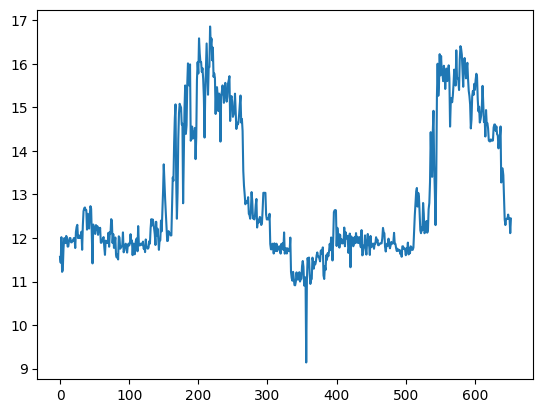

In [50]:
plt.plot(preds)

In [51]:
df['Delivered water'] = preds[:398]
df

Collection Date/Time  Delivered water
0          2022/1/1 0:00        11.567448
1          2022/1/2 0:00        11.432169
2          2022/1/3 0:00        12.018837
3          2022/1/4 0:00        11.222002
4          2022/1/5 0:00        11.259517
..                   ...              ...
393       2023/1/29 0:00        11.799131
394       2023/1/30 0:00        11.483644
395       2023/1/31 0:00        11.950389
396        2023/2/1 0:00        12.592982
397        2023/2/2 0:00        12.633500

[398 rows x 2 columns]

In [52]:
df.to_csv('preds.csv', index=False)